In [93]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 14, 6

import missingno as msno
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta

In [2]:
data = pd.read_csv('member_sample.csv', index_col = 0)

In [3]:
data.head()

,Individual Key,Household Key,Member Flag,City,State - Grouped,ZIP5,ZIP9,FSV CMSI Flag,FSV Credit Card Flag,FSV Deposit Program Flag,...,SC Vehicle Manufacturer Name,SC Vehicle Model Name,SVC Facility Name,SVC Facility Type,Total Cost,Tow Destination Latitude,Tow Destination Longitude,Tow Destination Name,Was Duplicated,Was Towed To AAR Referral
0,10000003.0,10462590.0,Y,NEW HAVEN,CT,6511.0,65111349.0,N,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,N,...,TOYOTA,CAMRY,ASTRO WRECKER SERVICE,independent repair,32.5,41.0,-71.0,Aar / Johnson's Auto Service,0.0,1.0
2,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,N,...,TOYOTA,CAMRY,Astro Wrecker Service,independent repair,30.0,0.0,0.0,NaN,0.0,0.0
3,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,N,...,TOYOTA,CAMRY,ASTRO WRECKER SERVICE,independent repair,32.5,0.0,0.0,NaN,0.0,0.0
4,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,N,...,TOYOTA,CAMRY,ASTRO WRECKER SERVICE,independent repair,30.0,0.0,0.0,NaN,0.0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21344 entries, 0 to 99998
Columns: 112 entries, Individual Key to Was Towed To AAR Referral
dtypes: float64(35), object(77)
memory usage: 18.4+ MB


### Check Null columns

In [5]:
data.isnull().sum()

Individual Key                        0
Household Key                         0
Member Flag                           0
City                                  0
State - Grouped                       0
ZIP5                                  0
ZIP9                                  0
FSV CMSI Flag                         0
FSV Credit Card Flag                  0
FSV Deposit Program Flag              0
FSV Home Equity Flag                  0
FSV ID Theft Flag                     0
FSV Mortgage Flag                     0
INS Client Flag                       0
TRV Globalware Flag                   0
Number of Children                 9334
Responded to Catalog              20484
Race                               9334
Length Of Residence                9334
Mail Responder                     9334
Home Owner                         9715
Income                             9401
Date Of Birth                     11153
Children                           9334
Education                          9334


### Write function to calculate age

In [6]:
def calcualte_age(date_string):
    try:
        iso = datetime.fromisoformat(date_string)
        age = (datetime.now() - iso) // timedelta(days=365.2425)
    except:
        age = 0
    return age

In [7]:
data['age'] = [calcualte_age(item) for item in data['Date Of Birth']]

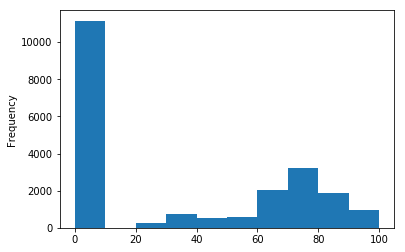

In [8]:
data.age.plot(kind = 'hist')

In [9]:
data.age.replace(0,data.age[data.age != 0].mean(axis=0),inplace=True)

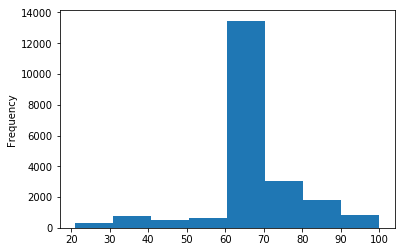

In [10]:
data.age.plot(kind = 'hist', bins = 8)

<function matplotlib.pyplot.show(*args, **kw)>

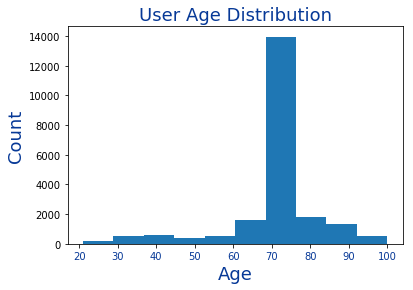

In [11]:
X = data.age
DF_75th = round(X.describe()['75%'], 2)
DF_AVG = round(X.describe()['mean'], 2)

plt.hist(X)
plt.ylabel('Count', fontsize = 18, color = '#073997')
plt.xlabel('Age', fontsize = 18, color = '#073997')
plt.xticks( fontsize =10, color = '#073997')
plt.title('User Age Distribution', fontsize = 18, color = '#073997')
plt.savefig('User_age_histogram', bbox_inches = 'tight')
plt.show

### Deal with null values

In [12]:
nulls = data.isnull().sum()

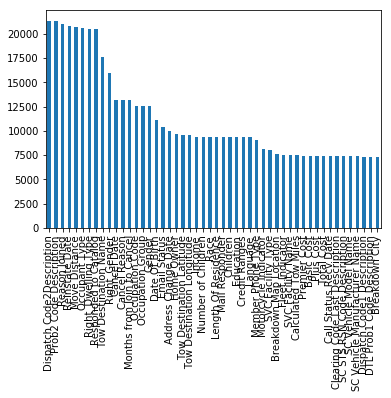

In [13]:
nulls.nlargest(50).plot(kind = 'bar')

In [14]:
data['Reason Joined'].value_counts()

U                      168
Dependable Services    127
5                       45
Family Plan Avail       19
Nation Wide Rd Srv       7
Gift Membership          5
Free Membership          4
3                        3
Club Reputation          3
Convenient Offices       1
Direct Mail              1
Recommend/Referral       1
Variety of Services      1
Prior Family Exp         1
7                        1
Other                    1
Name: Reason Joined, dtype: int64

In [15]:
data['Reason Joined'].fillna('unknown', inplace = True)

In [16]:
data['Reason Joined'].value_counts()

unknown                20956
U                        168
Dependable Services      127
5                         45
Family Plan Avail         19
Nation Wide Rd Srv         7
Gift Membership            5
Free Membership            4
3                          3
Club Reputation            3
Direct Mail                1
Variety of Services        1
Prior Family Exp           1
7                          1
Convenient Offices         1
Other                      1
Recommend/Referral         1
Name: Reason Joined, dtype: int64

In [17]:
data.Income.value_counts()

100-149,999      2577
90-99,999        2400
70-79,999        1000
50-59,999         888
40-49,999         771
10-19,999         688
175 - 199,999     600
30-39,999         553
60-69,999         541
150 - 174,999     438
20-29,999         425
200 - 249,999     424
250K+             397
Under 10K         226
80-89,999          15
Name: Income, dtype: int64

In [18]:
data.Income.fillna('unknown', inplace = True)

In [19]:
data.Income.value_counts()

unknown          9401
100-149,999      2577
90-99,999        2400
70-79,999        1000
50-59,999         888
40-49,999         771
10-19,999         688
175 - 199,999     600
30-39,999         553
60-69,999         541
150 - 174,999     438
20-29,999         425
200 - 249,999     424
250K+             397
Under 10K         226
80-89,999          15
Name: Income, dtype: int64

In [20]:
data['Home Owner'].value_counts()

Home Owner             11121
Renter                   491
Probable Renter           10
Probable Home Owner        7
Name: Home Owner, dtype: int64

In [21]:
data['Home Owner'].fillna('unknown', inplace = True)

In [22]:
data['Home Owner'].value_counts()

Home Owner             11121
unknown                 9715
Renter                   491
Probable Renter           10
Probable Home Owner        7
Name: Home Owner, dtype: int64

In [23]:
data.groupby('Home Owner')['FSV CMSI Flag'].size()

Home Owner
Home Owner             11121
Probable Home Owner        7
Probable Renter           10
Renter                   491
unknown                 9715
Name: FSV CMSI Flag, dtype: int64

### Turn Y and N into boolean 1 or 0 

In [24]:
def yes_noer(x):
    if x == 'Y':
        return 1
    elif x == 'N':
        return 0
    else:
        return np.nan

In [25]:
data['FSV CMSI Flag'] = data['FSV CMSI Flag'].apply(yes_noer)

In [26]:
data.groupby('Home Owner')['FSV CMSI Flag'].mean()

Home Owner
Home Owner             0.058988
Probable Home Owner    0.000000
Probable Renter        0.000000
Renter                 0.097760
unknown                0.025425
Name: FSV CMSI Flag, dtype: float64

In [27]:
home_owners = data[data['Home Owner'] == 'Home Owner']

In [28]:
home_owners['FSV CMSI Flag'].describe()

count    11121.000000
mean         0.058988
std          0.235612
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: FSV CMSI Flag, dtype: float64

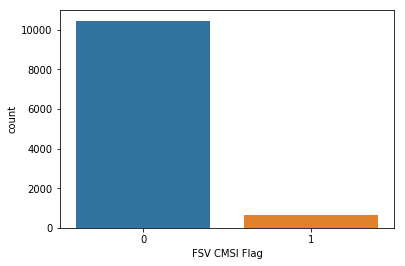

In [29]:
sns.countplot(home_owners['FSV CMSI Flag'])

In [30]:
bought_mortgage = home_owners[home_owners['FSV CMSI Flag'] == 1]

In [31]:
bought_mortgage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 656 entries, 429 to 99987
Columns: 113 entries, Individual Key to age
dtypes: float64(36), int64(1), object(76)
memory usage: 584.2+ KB


In [ ]:
data['Premier Cost'].value_counts()

### Homeowners with high Income engage in the Morgage Service

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

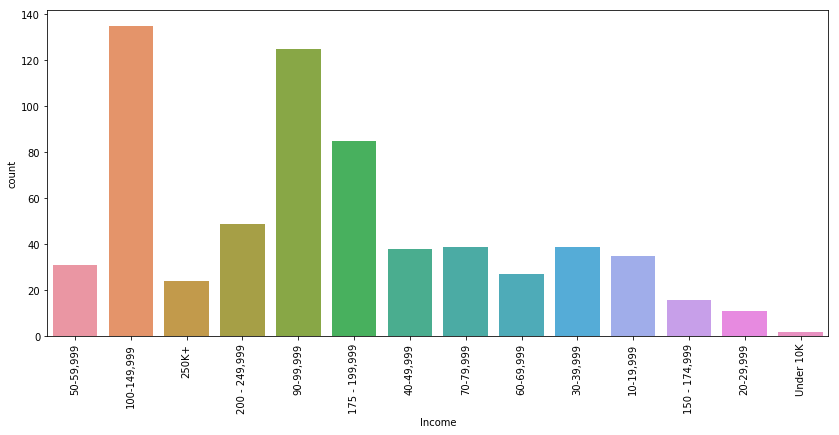

In [36]:
sns.countplot(bought_mortgage['Income'])
plt.xticks(rotation = 90)

### Aggregate data by household Key

In [38]:
data_categorical = pd.get_dummies(data[['Household Key', 'FSV CMSI Flag', 'SC Vehicle Manufacturer Name']])

In [81]:
cols = data_categorical.columns

In [89]:
cnt_list = ['sum' for c in cols]

In [90]:
col_dict = {f:v for f, v in zip(cols, cnt_list)}

In [91]:
col_dict['FSV CMSI Flag'] = 'max'
col_dict['Household Key'] = 'max'

In [92]:
data_categorical.groupby('Household Key').agg(col_dict)

,Household Key,FSV CMSI Flag,SC Vehicle Manufacturer Name_ACURA,SC Vehicle Manufacturer Name_ALFA ROMEO,SC Vehicle Manufacturer Name_AMERICAN AUSTIN,SC Vehicle Manufacturer Name_APRILIA,SC Vehicle Manufacturer Name_AUDI,SC Vehicle Manufacturer Name_AUSTIN HEALEY,SC Vehicle Manufacturer Name_Audi,SC Vehicle Manufacturer Name_BICYCLE,...,SC Vehicle Manufacturer Name_TOYOTA,SC Vehicle Manufacturer Name_TRIUMPH,SC Vehicle Manufacturer Name_Toyota,SC Vehicle Manufacturer Name_UNK,SC Vehicle Manufacturer Name_VOLKSWAGEN,SC Vehicle Manufacturer Name_VOLKSWAGON,SC Vehicle Manufacturer Name_VOLVO,SC Vehicle Manufacturer Name_Volkswagen,SC Vehicle Manufacturer Name_Volvo,SC Vehicle Manufacturer Name_nissan
Household Key,,,,,,,,,,,,,,,,,,,,,
875.0,875.0,0,0,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,0
969.0,969.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3338.0,3338.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8718.0,8718.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11524.0,11524.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13422.0,13422.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19747.0,19747.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20469.0,20469.0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
20850.0,20850.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


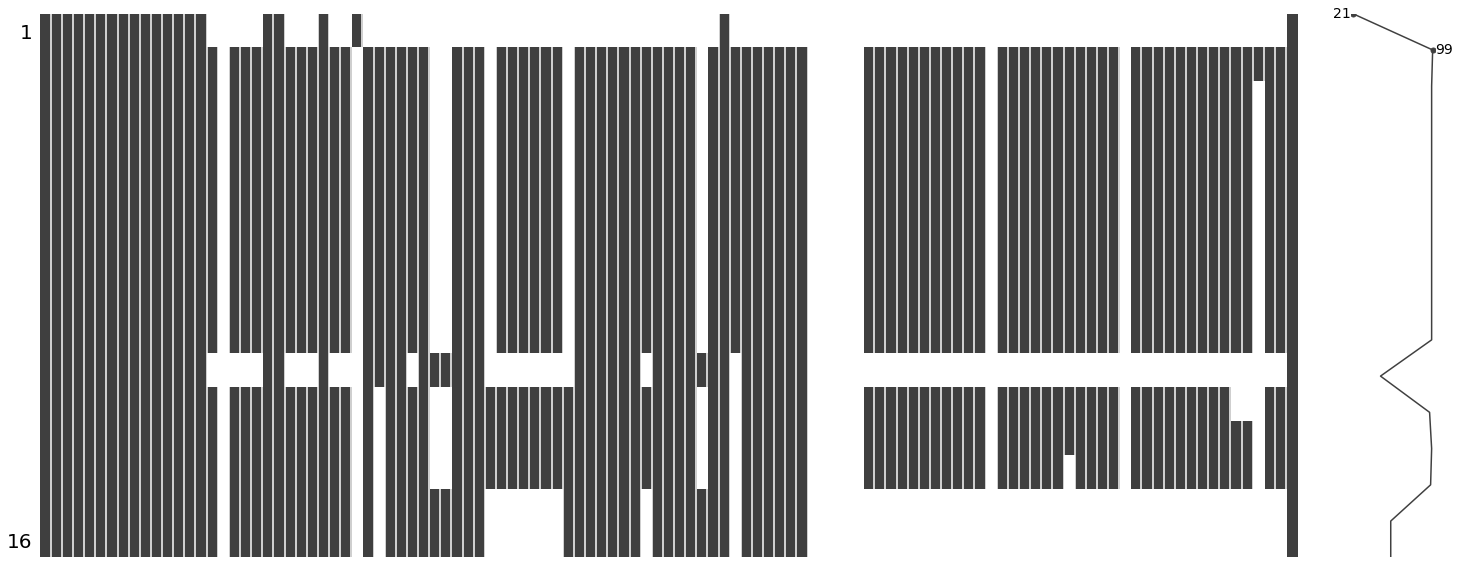

In [109]:
msno.matrix(data.loc[:15])